In [4]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [5]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS =3
EPOCHS = 20

In [6]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
"Potato\Train", shuffle = True , image_size =(IMAGE_SIZE ,IMAGE_SIZE),batch_size = BATCH_SIZE
)

Found 900 files belonging to 3 classes.


In [7]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [8]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[2 2 2 0 0 2 2 2 2 1 2 0 0 0 2 2 1 1 2 1 1 2 1 1 2 0 2 1 2 0 2 1]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(256, 256, 3)


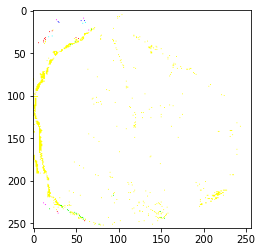

In [9]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy())
    
    print(image_batch[0].shape)

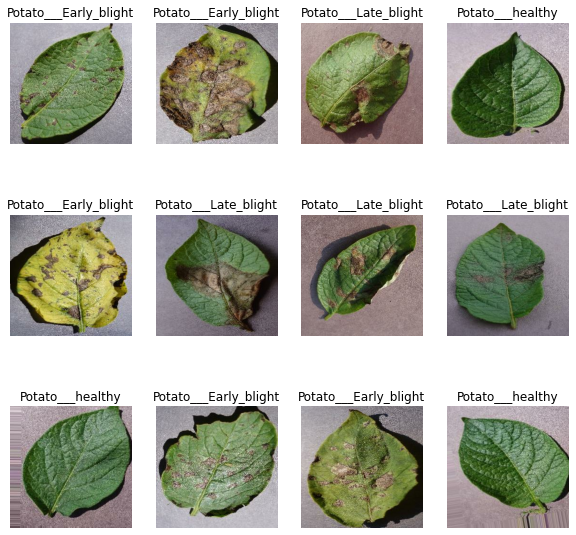

In [10]:
plt.figure(figsize =(10,10))

for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [11]:
len(dataset)

29

In [12]:
train_size = 0.8
len(dataset)*train_size

23.200000000000003

In [13]:
def get_dataset_partitions_tf(ds,train_split=0.8, val_split =0.1 , test_split=0.1, shuffle = True,shuffle_size =10000):
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)
    train_size = int(train_split *ds_size)
    val_size = int(val_split*ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds , val_ds, test_ds

In [14]:
train_ds , val_ds , test_ds = get_dataset_partitions_tf(dataset)

In [15]:
len(train_ds)

23

In [16]:
len(val_ds)

2

In [17]:
len(test_ds)

4

In [18]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [19]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [20]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
    
    
])

In [21]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE , CHANNELS)
n_classes= 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3), activation ='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation = 'relu'),
    layers.Dense(n_classes ,activation='softmax'),
    
])
model.build(input_shape = input_shape)

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [23]:
model.compile(
  optimizer ='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics =['accuracy']
)

In [24]:
history = model.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/50
23/23 [==============================] - 48s 2s/step - loss: 1.1003 - accuracy: 0.3249 - val_loss: 1.0997 - val_accuracy: 0.3281
Epoch 2/50
23/23 [==============================] - 43s 2s/step - loss: 1.0979 - accuracy: 0.3432 - val_loss: 1.0829 - val_accuracy: 0.3281
Epoch 3/50
23/23 [==============================] - 44s 2s/step - loss: 0.9961 - accuracy: 0.4732 - val_loss: 0.8014 - val_accuracy: 0.5625
Epoch 4/50
23/23 [==============================] - 43s 2s/step - loss: 0.7609 - accuracy: 0.6624 - val_loss: 0.7368 - val_accuracy: 0.6250
Epoch 5/50
23/23 [==============================] - 43s 2s/step - loss: 0.6882 - accuracy: 0.6907 - val_loss: 0.6156 - val_accuracy: 0.6719
Epoch 6/50
23/23 [==============================] - 43s 2s/step - loss: 0.4968 - accuracy: 0.7627 - val_loss: 0.5314 - val_accuracy: 0.7188
Epoch 7/50
23/23 [==============================] - 626s 28s/step - loss: 0.3995 - accuracy: 0.8362 - val_loss: 0.4669 - val_accuracy: 0.7031
Epoch 8/50
23/23 [

In [25]:
scores = model.evaluate(test_ds)

4/4 [==============================] - 3s 510ms/step - loss: 0.0810 - accuracy: 0.9609


In [26]:
scores

[0.08095299452543259, 0.9609375]

In [27]:
history

In [28]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 23}

In [29]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

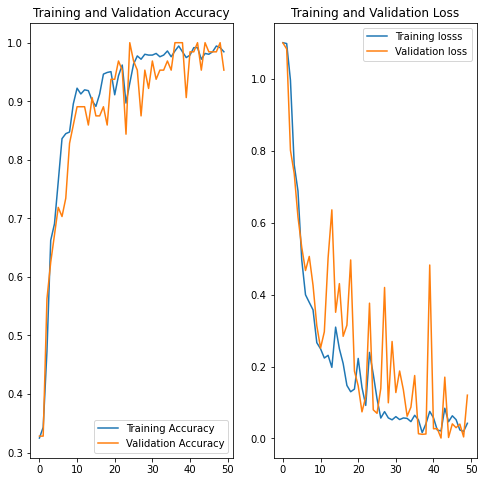

In [31]:
plt.figure(figsize =(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc , label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc , label ='Validation Accuracy')
plt.legend(loc ='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS ), loss, label ='Training losss')
plt.plot(range(EPOCHS), val_loss , label ='Validation loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual lable: Potato___healthy
Predicted lable : Potato___healthy


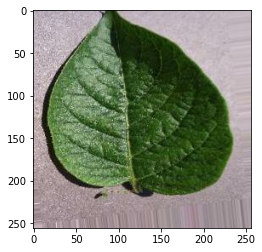

In [37]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual lable:", class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    predict_class =  class_names[np.argmax(batch_prediction[0])]
    print("Predicted lable :",predict_class)
    

In [38]:
def predict(model , img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0)
    predictions = model.predict(img_array)
    confidence = round(100*(np.max(predictions[0])),2)
    return predicted_class, confidence


NameError: name 'img_to_array' is not defined

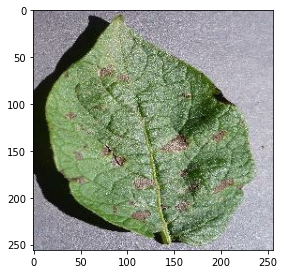

In [39]:
plt.figure(figsize = (15,15))
for images , labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual: {actual_class}, \n Predicted: {predicted_class},\n Confidence: {confidence}%")
        plt.axis("off")

In [ ]:
model.save("Potato/models/potatoes.h5")